In [1]:
import wandb
api = wandb.Api()


In [8]:
groups = {
    "AD": "plan-SparsePointEnv-v0--08-05-21:04:47",
    "AD++": "plan-SparsePointEnv-v0--08-05-21:13:01",
    "AD++ w/2-Beam Search": "plan-SparsePointEnv-v0--03-09-19:56:53", 
    "AD++ w/3-Beam Search": "plan-SparsePointEnv-v0--08-05-21:25:25",
}

In [11]:
import pandas as pd

def generate_dfs():
    for name, group in groups.items():
        runs = api.runs("rldl/In-Context Model-Based Planning", {"$and": [{"group": group}]})
        for run in runs:
            history = pd.DataFrame(run.history())
            history['algorithm'] = name
            yield history

orig = pd.concat(list(generate_dfs()))
list(orig.columns)

['/shared/home/ethanbro/rldl18/wandb/wandb/run-20230508_210814-7fe51_00015/files/0_plan.mp4',
 '/shared/home/ethanbro/rldl18/wandb/wandb/run-20230508_210814-7fe51_00015/files/rollout.mp4',
 'total_reward',
 'episode_return',
 'reward',
 '_runtime',
 '_timestamp',
 '_step',
 'score',
 'algorithm',
 '/shared/home/ethanbro/rldl18/wandb/wandb/run-20230508_210813-7fe51_00014/files/0_plan.mp4',
 '/shared/home/ethanbro/rldl18/wandb/wandb/run-20230508_210813-7fe51_00014/files/rollout.mp4',
 '/shared/home/ethanbro/rldl18/wandb/wandb/run-20230508_210811-7fe51_00013/files/0_plan.mp4',
 '/shared/home/ethanbro/rldl18/wandb/wandb/run-20230508_210811-7fe51_00013/files/rollout.mp4',
 '/shared/home/ethanbro/rldl18/wandb/wandb/run-20230508_210806-7fe51_00012/files/0_plan.mp4',
 '/shared/home/ethanbro/rldl18/wandb/wandb/run-20230508_210806-7fe51_00012/files/rollout.mp4',
 '/shared/home/ethanbro/rldl18/wandb/wandb/run-20230508_210746-7fe51_00011/files/rollout.mp4',
 '/shared/home/ethanbro/rldl18/wandb/wan

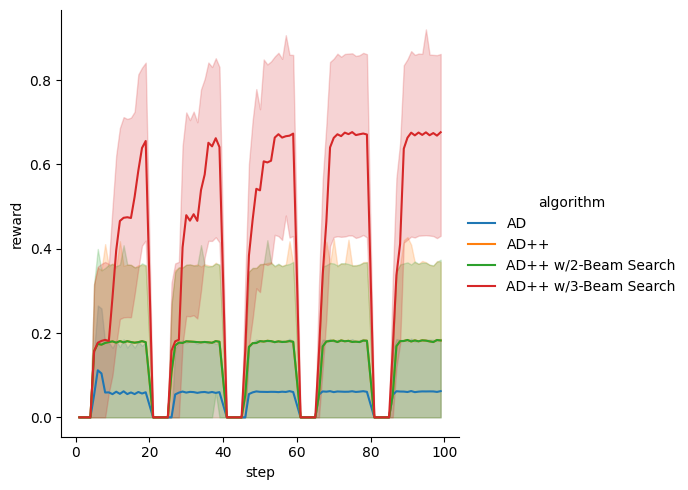

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.reset_defaults()

df = orig.rename(columns={"_step": "step"}).reset_index()
df = df[df.step <= 100]
g = sns.relplot(data=df, kind="line", x="step", y="reward", hue="algorithm")
plt.show()